In [4]:
pip install keras scikit-learn matplotlib

     ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 5.6/5.6 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 10.1 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


Epoch 1/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0416 - accuracy: 0.9868
Epoch 2/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0324 - accuracy: 0.9879
Epoch 3/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0317 - accuracy: 0.9880
Epoch 4/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0309 - accuracy: 0.9879
Epoch 5/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0304 - accuracy: 0.9879
Epoch 6/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0293 - accuracy: 0.9881
Epoch 7/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0278 - accuracy: 0.9884
Epoch 8/10
3994/3994 [==============================] - 9s 2ms/step - loss: 0.0260 - accuracy: 0.9890
Epoch 9/10
3994/3994 [==============================] - 10s 2ms/step - loss: 0.0244 - accuracy: 0.9899
Epoch 10/10
999/999 [==============================] - 2s 2ms/step
=======

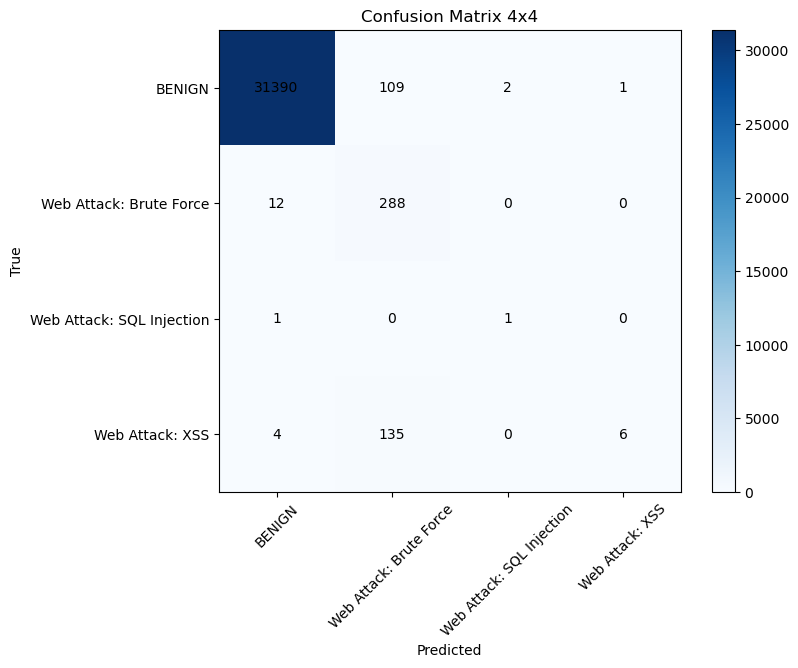

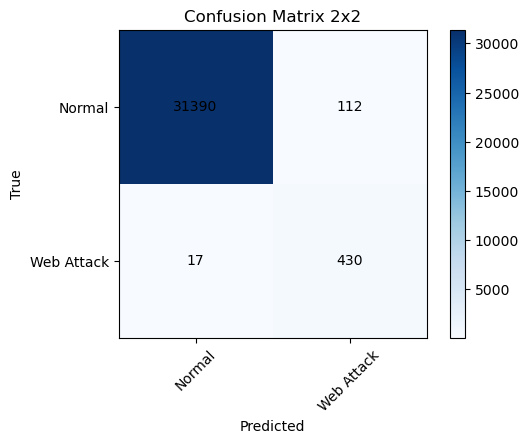

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# Load the dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Map label values to corresponding attack names
label_mapping = {
    0: 'BENIGN',
    1: 'Web Attack: Brute Force',
    2: 'Web Attack: SQL Injection',
    3: 'Web Attack: XSS'
}
df['Label'] = df['Label'].map(label_mapping)

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (labels)

# Encode labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = np_utils.to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 output classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Predict the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels)

# Convert one-hot encoded y_test back to labels
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
confusion_matrix_4x4 = confusion_matrix(y_test_labels, y_pred_labels)

# Calculate values for the 2x2 confusion matrix
TN = confusion_matrix_4x4[0, 0]  # True Negatives (0, 0)
FP = np.sum(confusion_matrix_4x4[0, 1:])  # False Positives (0, 1+2+3)
FN = np.sum(confusion_matrix_4x4[1:, 0])  # False Negatives (1+2+3, 0)
TP = np.sum(confusion_matrix_4x4[1:, 1:])  # True Positives (1+2+3, 1+2+3)
confusion_matrix_2x2 = np.array([[TN, FP], [FN, TP]])

classification = classification_report(y_test_labels, y_pred_labels)

# Plot the confusion matrix 4x4
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix_4x4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix 4x4')
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['BENIGN', 'Web Attack: Brute Force', 'Web Attack: SQL Injection', 'Web Attack: XSS'], rotation=45)
plt.yticks(tick_marks, ['BENIGN', 'Web Attack: Brute Force', 'Web Attack: SQL Injection', 'Web Attack: XSS'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(confusion_matrix_4x4[i, j]), horizontalalignment='center', verticalalignment='center')

# Plot the confusion matrix 2x2
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix_2x2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix 2x2')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Web Attack'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Web Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix_2x2[i, j]), horizontalalignment='center', verticalalignment='center')

# Print the model's evaluation results
print('======= Neural Network Model ============')
print()
print("Model Accuracy:\n", accuracy)
print()
print("Confusion matrix 4x4:\n", confusion_matrix_4x4)
print()
print("Confusion matrix 2x2:\n", confusion_matrix_2x2)
print()
print("Classification report:\n", classification)
print()


Distribution of Attacks:


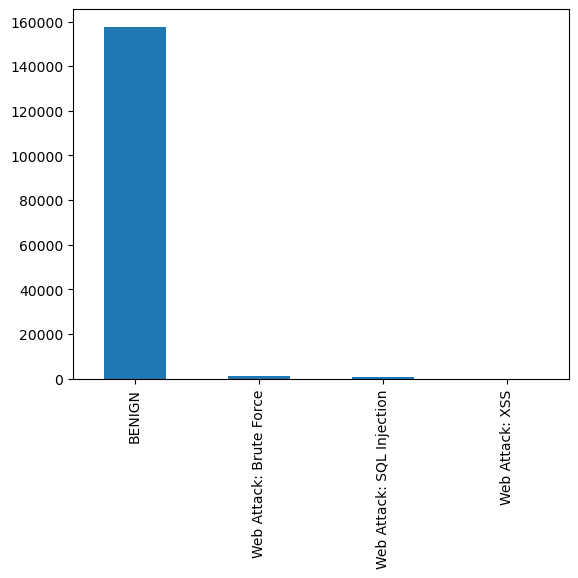

In [22]:
print("Distribution of Attacks:")
df['Label'].value_counts().plot(kind='bar', xticks=np.arange(4),
                                tick_label=['BENIGN', 'Web Attack: Brute Force', 'Web Attack: SQL Injection', 'Web Attack: XSS'])
plt.show()

In [25]:
# Create a DataFrame to store the evaluation metrics
evaluation_data = pd.DataFrame({
    'Model': ['Neural Network'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1]
})

# Save the evaluation metrics to a CSV file
evaluation_data.to_csv('evaluation_results_NT.csv', index=False)

In [26]:
print(evaluation_data)

            Model  Accuracy  Precision    Recall  F1-score
0  Neural Network  0.991737    0.99447  0.991737  0.990871
